# Pandas Tools Demonstration (Chipotle Dataset)

## Setup + Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("chipotle.tsv", sep="\t")
df.head()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## 1. I/O Tools

In [6]:
#chuyển từ tsv -> csv
df = pd.read_csv("chipotle.tsv", sep="\t")
df.to_csv("chipotle_export.csv", index=False)
print("Exported to chipotle_export.csv")


Exported to chipotle_export.csv


## 2. Data Cleaning

In [7]:
#làm sạch item_price bằng cách bỏ $. 
#Ví dụ: $8.49 -> 9.49
df_clean = df.copy()

df_clean["item_price"] = (
    df_clean["item_price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .astype(float)
)

df_clean[["item_price"]].head()


,item_price
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98


## 3. Selection & Filtering

In [8]:
#lọc các dòng có giá > 10.
df_clean[df_clean["item_price"] > 10].head(10)


,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
43,20,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",11.75
45,21,1,Chicken Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",10.98
52,24,1,Chicken Burrito,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",10.98


## 4.Data Transformation

In [9]:
df_clean["total_price"] = df_clean["quantity"] * df_clean["item_price"]
df_clean[["quantity", "item_price", "total_price"]].head()


,quantity,item_price,total_price
0,1,2.39,2.39
1,1,3.39,3.39
2,1,3.39,3.39
3,1,2.39,2.39
4,2,16.98,33.96


## 5. Aggregation & Grouping

In [10]:
#op 10 món theo tổng số lượng bán (quantity)
top_items = (
    df_clean.groupby("item_name")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_items


item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

## 6.Combining Data

In [11]:
#tạo 2 bảng tổng hợp rồi merge
total_qty = (
    df_clean.groupby("item_name")["quantity"]
    .sum()
    .reset_index(name="total_qty")
)

avg_price = (
    df_clean.groupby("item_name")["item_price"]
    .mean()
    .reset_index(name="avg_item_price")
)

combined = pd.merge(total_qty, avg_price, on="item_name", how="inner")
combined.sort_values("total_qty", ascending=False).head(10)


,item_name,total_qty,avg_item_price
17,Chicken Bowl,761,10.113953
18,Chicken Burrito,591,10.082857
25,Chips and Guacamole,506,4.595073
39,Steak Burrito,386,10.465842
10,Canned Soft Drink,351,1.457641
23,Chips,230,2.342844
38,Steak Bowl,221,10.711801
6,Bottled Water,211,1.867654
24,Chips and Fresh Tomato Salsa,130,3.285091
9,Canned Soda,126,1.320577


## 7. Time Series

In [12]:
df_ts = df_clean[["order_id", "total_price"]].copy()

# tạo ngày giả lập: order_id tăng dần theo ngày
df_ts["date"] = pd.to_datetime("2024-01-01") + pd.to_timedelta(df_ts["order_id"], unit="D")

weekly_sales = (
    df_ts.set_index("date")["total_price"]
    .resample("W")
    .sum()
)

weekly_sales.head()


date
2024-01-07    110.39
2024-01-14     90.26
2024-01-21    116.72
2024-01-28    107.54
2024-02-04    140.30
Freq: W-SUN, Name: total_price, dtype: float64

## 8. Basic analysis & descriptive statistics

In [13]:
#thống kê + mô tả các cột

df_clean[["quantity", "item_price", "total_price"]].describe()


,quantity,item_price,total_price
count,4622.000000,4622.000000,4622.000000
mean,1.075725,7.464336,8.489186
std,0.410186,4.245557,12.632060
min,1.000000,1.090000,1.090000
25%,1.000000,3.390000,3.990000
50%,1.000000,8.750000,8.750000
75%,1.000000,9.250000,10.980000
max,15.000000,44.250000,663.750000


## 9. Quick visualization (supported by Matplotlib)

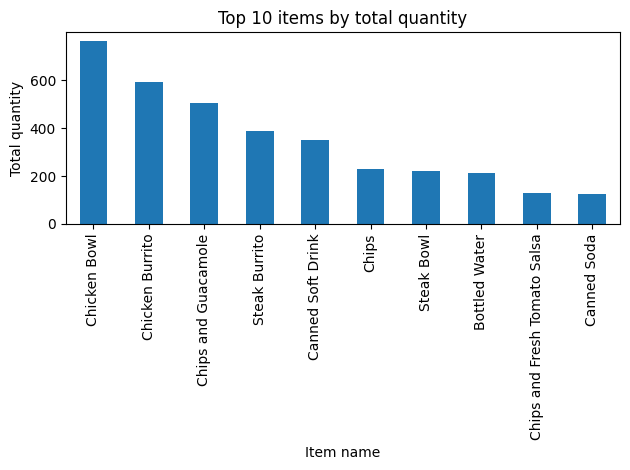

In [14]:
top_items.plot(kind="bar")
plt.title("Top 10 items by total quantity")
plt.xlabel("Item name")
plt.ylabel("Total quantity")
plt.tight_layout()
plt.show()


##